<a href="https://colab.research.google.com/github/nicolaaggeri/Prj_python/blob/main/Prj_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TODO list:
grafico a istogrammi raggruppando per anno e una colonna per ogni regione

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

data = pd.read_csv('https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/dati_turismo/Arrivi-negli-agriturismi-in-Italia-per-regione.csv', sep= ';')

display(data)

,Regione,Anno,Arrivi
0,Piemonte,2008,72531
1,Piemonte,2009,77626
2,Piemonte,2010,87681
3,Piemonte,2011,103404
4,Valle d'Aosta,2008,8087
...,...,...,...
75,Sicilia,2011,99863
76,Sardegna,2008,11620
77,Sardegna,2009,13231
78,Sardegna,2010,11318


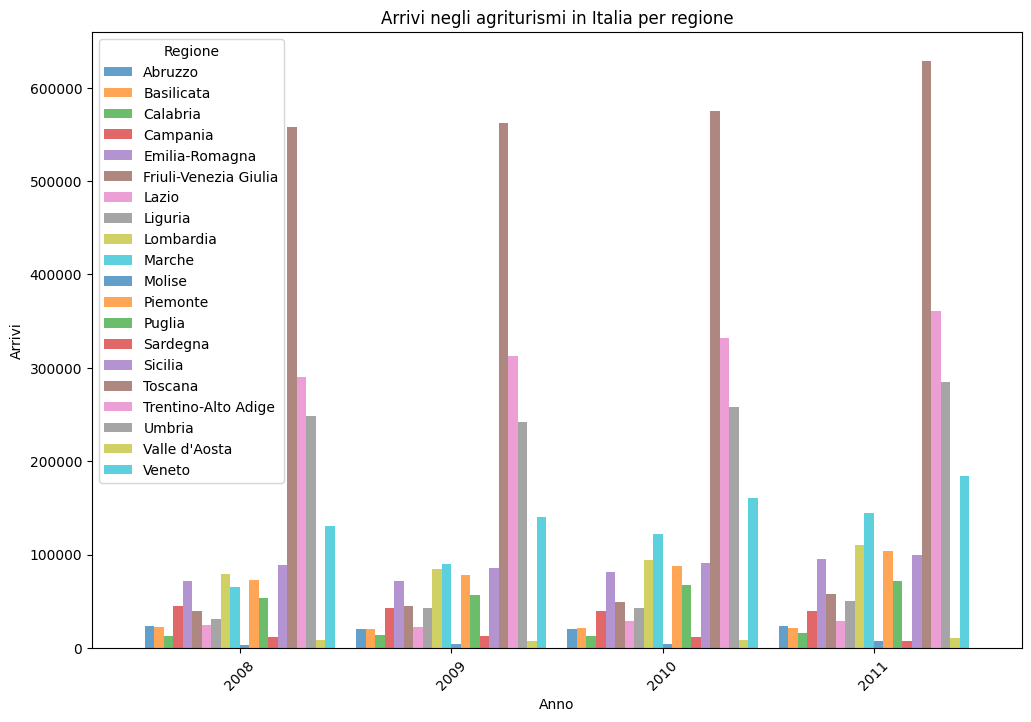

In [ ]:
# Assuming 'data' is your initial DataFrame
data = pd.DataFrame

# Calculate the average of 'Arrivi' per 'Regione' and 'Anno'
tabella = tabella.groupby(['Regione', 'Anno'])['Arrivi'].mean().reset_index()

# Set the 'Anno' as index
tabella.set_index('Anno', inplace=True)

# Pivot the table to have 'Regione' as columns for plotting
tabella_pivot = tabella.pivot(columns='Regione', values='Arrivi')

fig, ax = plt.subplots(figsize=(12, 8))  # Impostare le dimensioni della figura

# Creare il grafico a barre
tabella_pivot.plot(kind='bar', alpha=0.7, ax=ax, width=0.9)
ax.set_title('Arrivi negli agriturismi in Italia per regione')
ax.set_ylabel('Arrivi')
ax.set_xlabel('Anno')
ax.set_xticklabels(tabella_pivot.index, rotation=45)  # Ruotare le etichette dell'asse x per una migliore leggibilità
ax.axhline(y=stats_dict['average'], color=color, linestyle='-', label="average")
ax.legend(title='Regione')

plt.show()

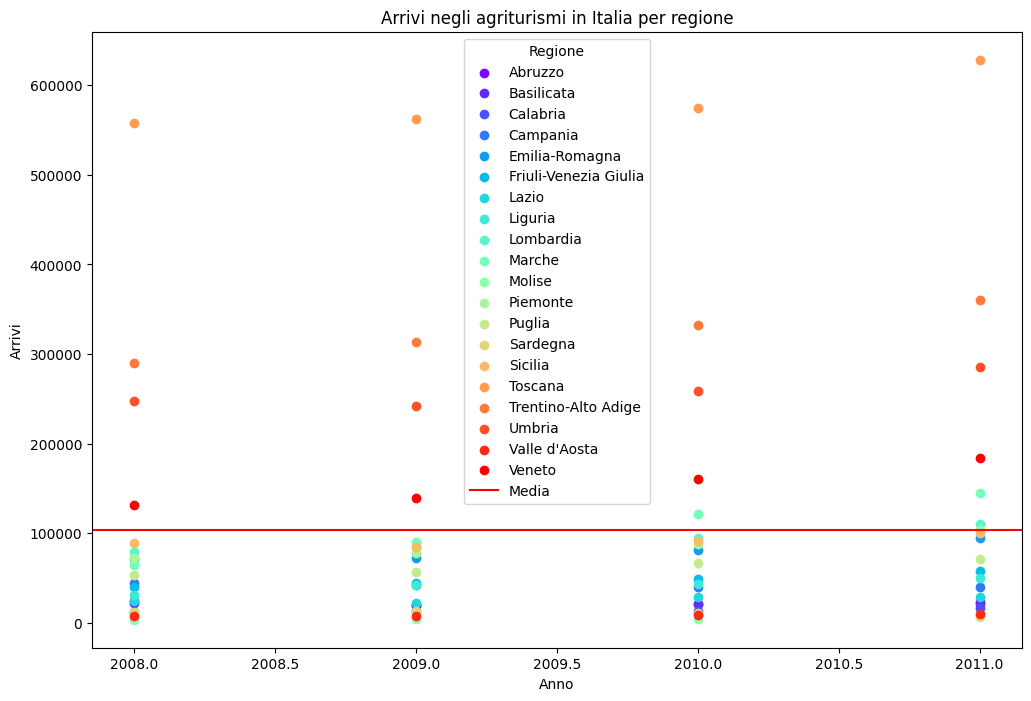

In [39]:
#Calcolare la media di 'Arrivi' per 'Regione' e 'Anno'
tabella = tabella.groupby(['Regione', 'Anno'])['Arrivi'].mean().reset_index()

# Impostare 'Anno' come indice
tabella.set_index('Anno', inplace=True)

# Calcolare la media totale
average = tabella['Arrivi'].mean()

# Creare la figura e gli assi con dimensioni personalizzate
fig, ax = plt.subplots(figsize=(12, 8))  # Impostare le dimensioni della figura

# Creare un array di colori
unique_regions = tabella['Regione'].unique()
colors = cm.rainbow(np.linspace(0, 1, len(unique_regions)))
color_dict = dict(zip(unique_regions, colors))

# Creare il grafico scatter
for regione in unique_regions:
    region_data = tabella[tabella['Regione'] == regione]
    ax.scatter(region_data.index, region_data['Arrivi'], label=regione, color=color_dict[regione])

# Tracciare la linea orizzontale per la media totale
ax.axhline(y=average, color='r', linestyle='-', label="Media")

# Impostare titolo e etichette
ax.set_title('Arrivi negli agriturismi in Italia per regione')
ax.set_ylabel('Arrivi')
ax.set_xlabel('Anno')
ax.legend(title='Regione')

'''
# Annotare i punti con i nomi delle regioni
for regione in unique_regions:
    region_data = tabella[tabella['Regione'] == regione]
    for i, row in region_data.iterrows():
        ax.annotate(row['Regione'],
                    xy=(i, row['Arrivi']),
                    xytext=(0, 5),  # Offset verticale di 5 punti
                    textcoords="offset points",
                    ha='center', va='bottom')
                    '''

plt.show()

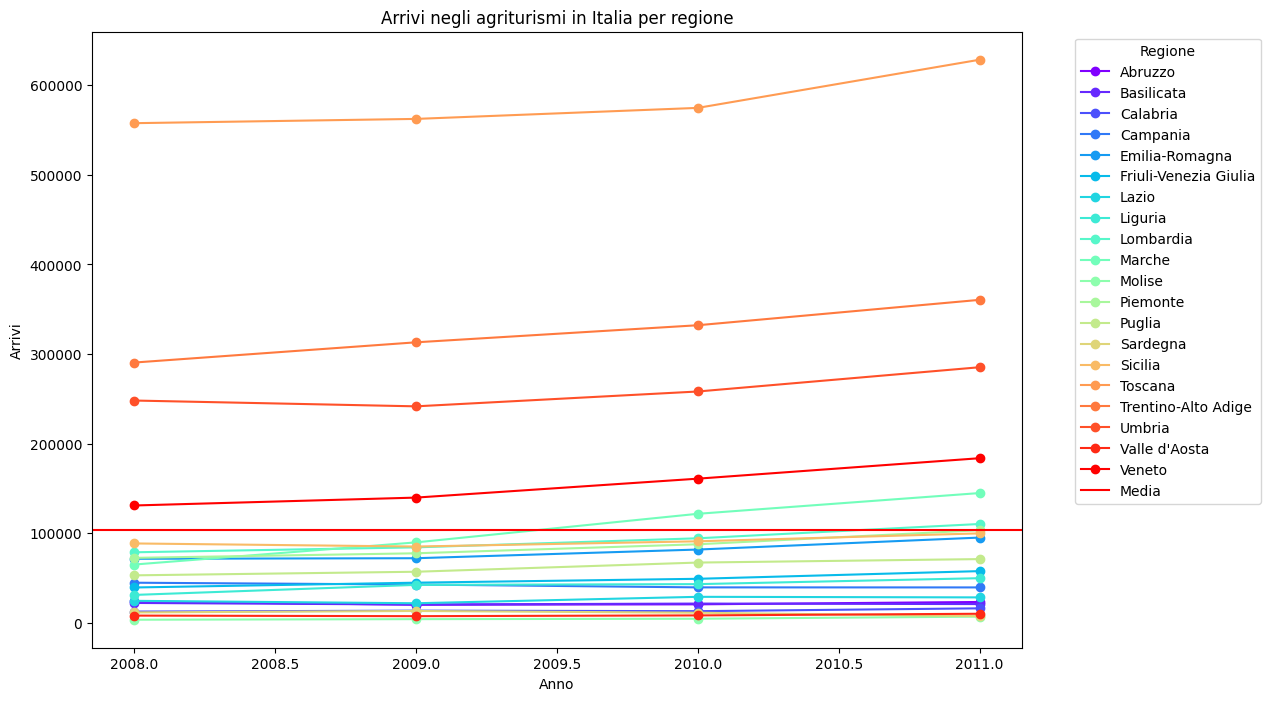

In [ ]:
# Calcolare la media di 'Arrivi' per 'Regione' e 'Anno'
tabella = tabella.groupby(['Regione', 'Anno'])['Arrivi'].mean().reset_index()

# Impostare 'Anno' come indice
tabella.set_index('Anno', inplace=True)

# Calcolare la media totale
average = tabella['Arrivi'].mean()

# Creare la figura e gli assi con dimensioni personalizzate
fig, ax = plt.subplots(figsize=(12, 8))  # Impostare le dimensioni della figura

# Creare un array di colori
unique_regions = tabella['Regione'].unique()
colors = cm.rainbow(np.linspace(0, 1, len(unique_regions)))
color_dict = dict(zip(unique_regions, colors))

# Creare il grafico a linee
for regione in unique_regions:
    region_data = tabella[tabella['Regione'] == regione]
    ax.plot(region_data.index, region_data['Arrivi'], marker='o', label=regione, color=color_dict[regione])

# Tracciare la linea orizzontale per la media totale
ax.axhline(y=average, color='r', linestyle='-', label="Media")

# Impostare titolo e etichette
ax.set_title('Arrivi negli agriturismi in Italia per regione')
ax.set_ylabel('Arrivi')
ax.set_xlabel('Anno')

ax.legend(title='Regione', bbox_to_anchor=(1.05, 1), loc='upper left')

'''
# Annotare i punti con i nomi delle regioni
for regione in unique_regions:
    region_data = tabella[tabella['Regione'] == regione]
    for i, row in region_data.iterrows():
        ax.annotate(row['Regione'],
                    xy=(i, row['Arrivi']),
                    xytext=(0, 5),  # Offset verticale di 5 punti
                    textcoords="offset points",
                    ha='center', va='bottom')
                    '''

plt.show()

    Regione  Anno   Arrivi
0  Piemonte  2008  2747466
1  Piemonte  2009  2948253
2  Piemonte  2010  3193461
3  Piemonte  2011  3290535
4  Piemonte  2012  3349225


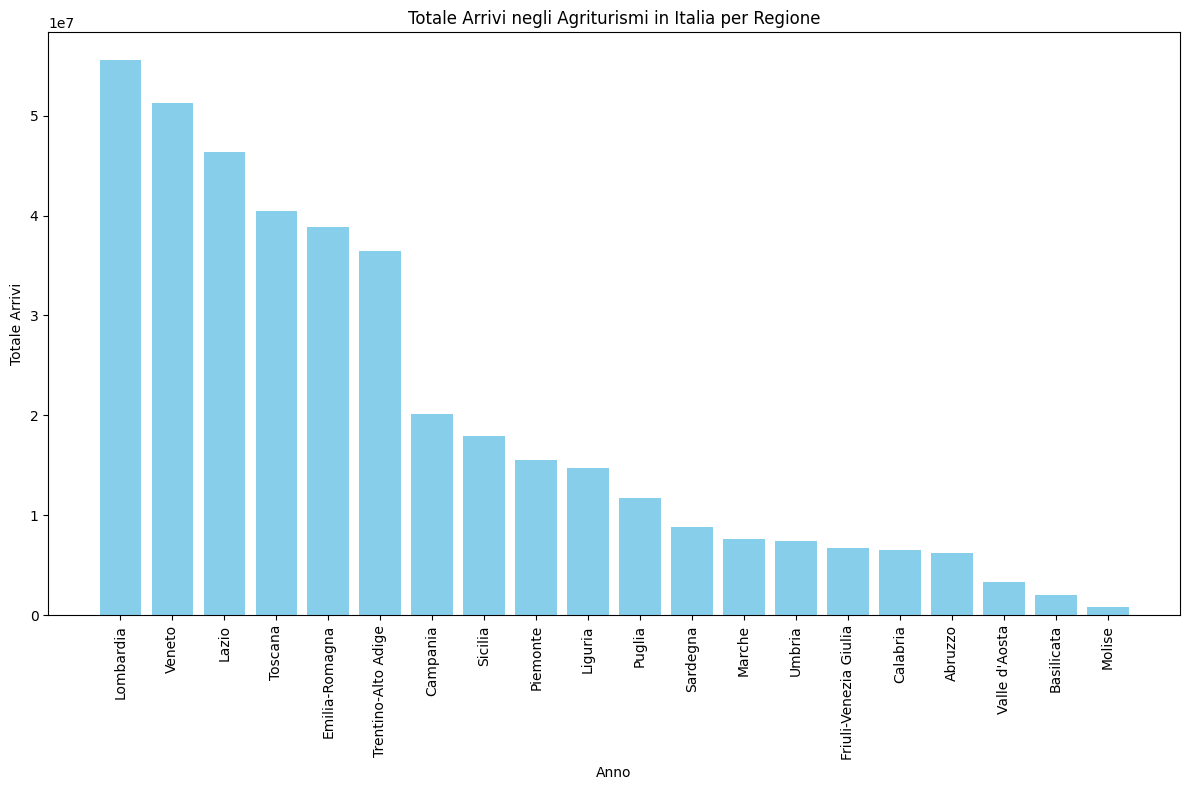

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Funzione per leggere un file CSV e creare un istogramma
def create_histogram_from_csv(file_path):
    # Legge il file CSV con il delimitatore ';'
    data = pd.read_csv(file_path, delimiter=';')

    # Rinomina le colonne rimuovendo eventuali spazi
    data.columns = data.columns.str.strip()

    # Assicurarsi che le colonne 'Anno' e 'Arrivi' siano di tipo numerico
    data['Anno'] = pd.to_numeric(data['Anno'], errors='coerce')
    data['Arrivi'] = pd.to_numeric(data['Arrivi'], errors='coerce')

    # Rimuove eventuali valori nulli
    data = data.dropna(subset=['Anno', 'Arrivi'])

    # Visualizza le prime righe del dataframe per capire la struttura
    print(data.head())

    # Aggrega i dati per regione sommando gli arrivi per ogni regione
    region_data = data.groupby('Regione')['Arrivi'].sum().reset_index()

    # Ordina i dati per numero di arrivi in modo decrescente
    region_data = region_data.sort_values('Arrivi', ascending=False)

    # Creiamo l'istogramma
    plt.figure(figsize=(12, 8))
    plt.bar(region_data['Regione'], region_data['Arrivi'], color='skyblue')


    # Aggiungiamo titolo e etichette agli assi
    plt.title('Totale Arrivi negli Agriturismi in Italia per Regione')
    plt.xlabel('Regione')
    plt.ylabel('Totale Arrivi')
    plt.xlabel('Anno')

    # Ruotiamo le etichette dell'asse x per migliorarne la leggibilità
    plt.xticks(rotation=90)

    # Mostriamo il grafico
    plt.tight_layout()
    plt.show()

# Specifica il percorso del file CSV
file_path = '/content/Arrivi-negli-esercizi-alberghieri-in-Italia-per-regione.csv'

# Chiama la funzione per creare l'istogramma
create_histogram_from_csv(file_path)
